In [1]:
import os
import sys

# and for local code
sys.path.append('..')
sys.path.insert(1, '/Users/butterchicken/research/exatrkx-neurips19/gnn-tracking/heptrkx')
sys.path.insert(1, '/Users/butterchicken/research/exatrkx-neurips19/gnn-tracking/heptrkx/nx_graph')
import networkx as nx
import numpy as np
from numpy import load
import matplotlib.pyplot as plt
import sklearn.metrics
from heptrkx.nx_graph import utils_plot
from utils_plot import plot_networkx
from heptrkx.nx_graph import utils_data
from heptrkx.nx_graph import prepare
from heptrkx.nx_graph import get_model
from nx_graph import prepare
from prepare import load_data_dicts
from mpl_toolkits.mplot3d import Axes3D

In [2]:
filename = '/Users/butterchicken/research/exatrkx-neurips19/gnn-tracking/out/nxgraphs_100/event000001010_g000000009_INPUT.npz'
nxgraphs = load(filename)
gg = nxgraphs.files
for item in gg:
    print(item)
    print(nxgraphs[item])

nodes
[[0.17078744 0.25114059 0.025711  ]
 [0.25919285 0.59548861 0.43720001]
 [0.35883698 0.30121702 0.5564    ]
 ...
 [0.17138749 0.57898563 0.172729  ]
 [0.25768781 0.74264002 0.26160002]
 [0.36372334 0.94916427 0.37120003]]
edges
[[ 0.23871566 -0.04458132  0.24284287 -0.0206785 ]
 [ 0.17039137 -0.02963886  0.17294994 -0.0122595 ]
 [ 0.23503197  0.05533978  0.24145914 -0.0197141 ]
 ...
 [ 0.04119665 -0.03935802  0.05697559  0.088     ]
 [ 0.00124021  0.1169216   0.11692818  0.10640004]
 [-0.03875255 -0.03812397  0.05436172  0.16439992]]
receivers
[  10  194 2227 ... 1698 2354  707]
senders
[   0    0    0 ... 2396 2396 2396]
globals
[0.]
n_node
2397
n_edge
19892


In [3]:
input_dict = load_data_dicts(filename)
target_dict = load_data_dicts(filename.replace("INPUT", "TARGET"))

In [4]:
G = utils_data.data_dict_to_nx(input_dict, target_dict)

/Users/butterchicken/opt/anaconda2/envs/exaktrx/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/butterchicken/opt/anaconda2/envs/exaktrx/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


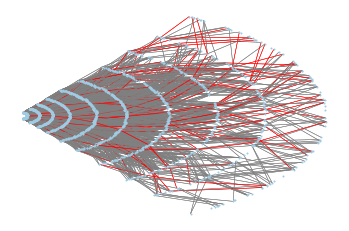

In [5]:
plot_networkx(G)

In [6]:
def network_plot_3D(G, angle, ia=30, save=False):
    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')
    n_edges = len(G.edges())
    # Get number of nodes
    n = G.number_of_nodes()
    # Get the maximum number of edges adjacent to a single node
    edge_max = max([G.degree(i) for i in range(n)])
    # Define color range proportional to number of edges adjacent to a single node
    edge_colors = [0.]*n_edges
    # 3D network plot
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(25,25))
        ax = Axes3D(fig)

        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]
            
            # Scatter plot
            ax.scatter(xi, yi, zi, c='grey',s=20+20*G.degree(key), edgecolors='k', alpha=0.7)
        
        # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
        # Those two points are the extrema of the line to be plotted
        for i,j in enumerate(G.edges(data=True)):
            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))
            if int(j[2]['solution'][0]) == 1:
                edge_colors[i] = 'r'
            else:
                edge_colors[i] = 'grey'
        
        # Plot the connecting lines
            ax.plot(x, y, z,  c=edge_colors[i], alpha=0.5)
    
    # Set the initial view
    ax.view_init(ia, angle)
    # Hide the axes
    #ax.set_axis_off()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    if save is not False:
        plt.savefig('/Users/butterchicken/research/exatrkx-neurips19/gnn-tracking/figs/' +str(angle).zfill(3)+ ".png")
        plt.close('all')
    else:
        plt.show()
    
    return



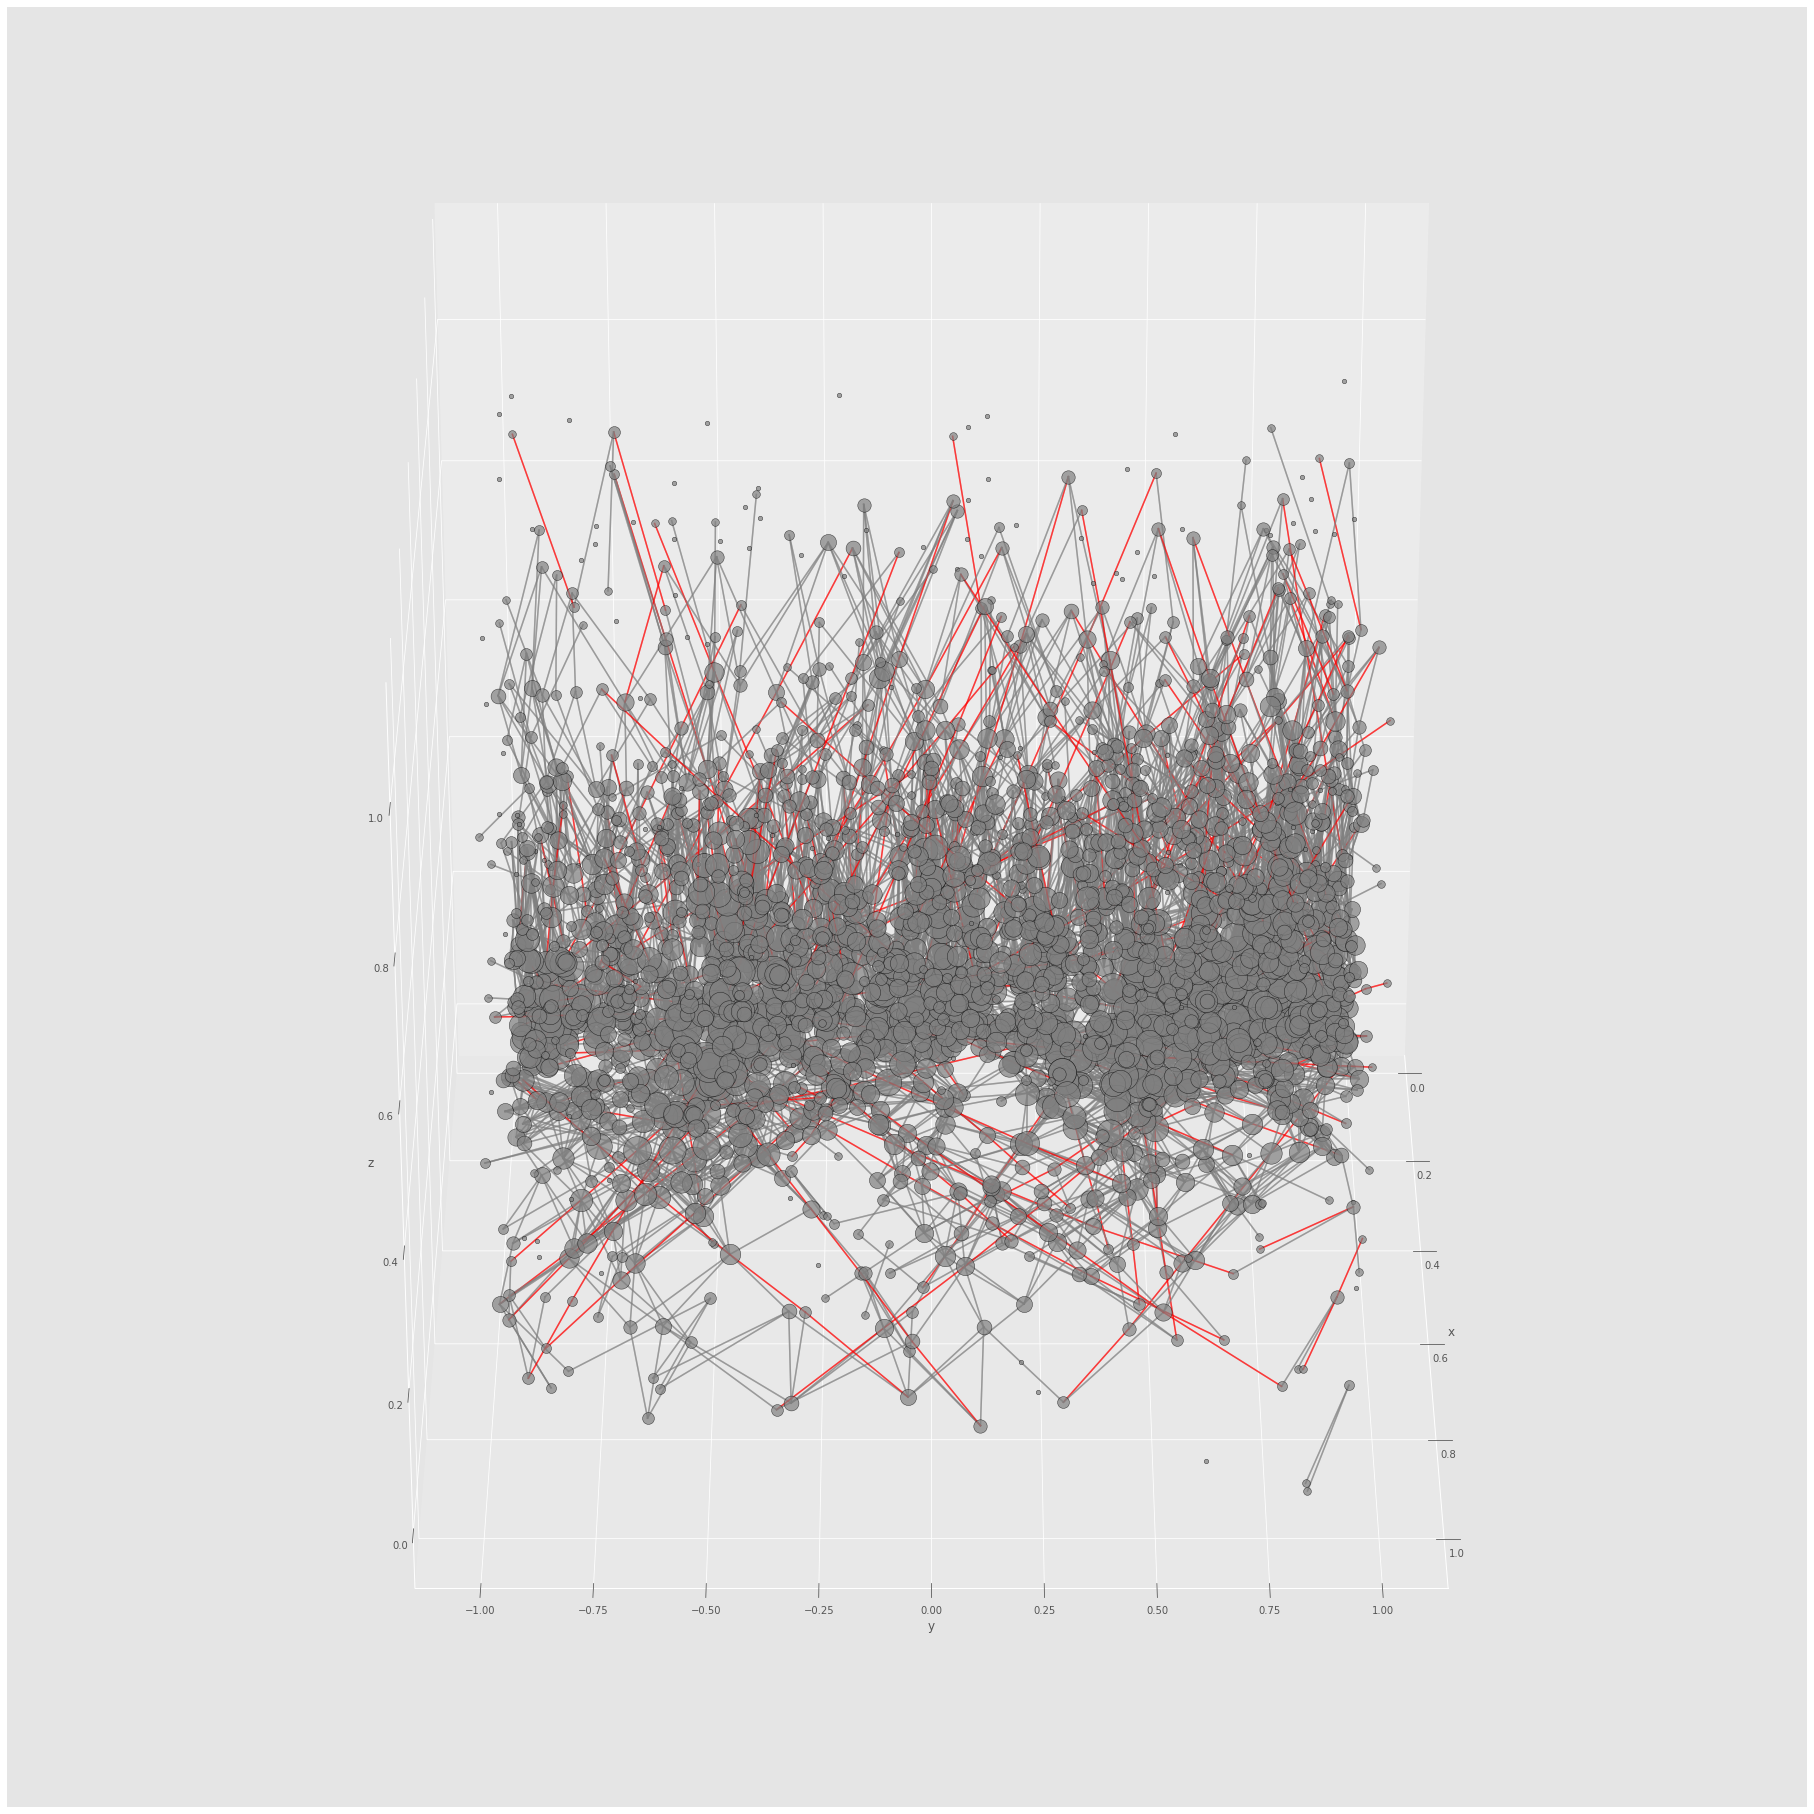

In [19]:
network_plot_3D(G,0, 30, False)

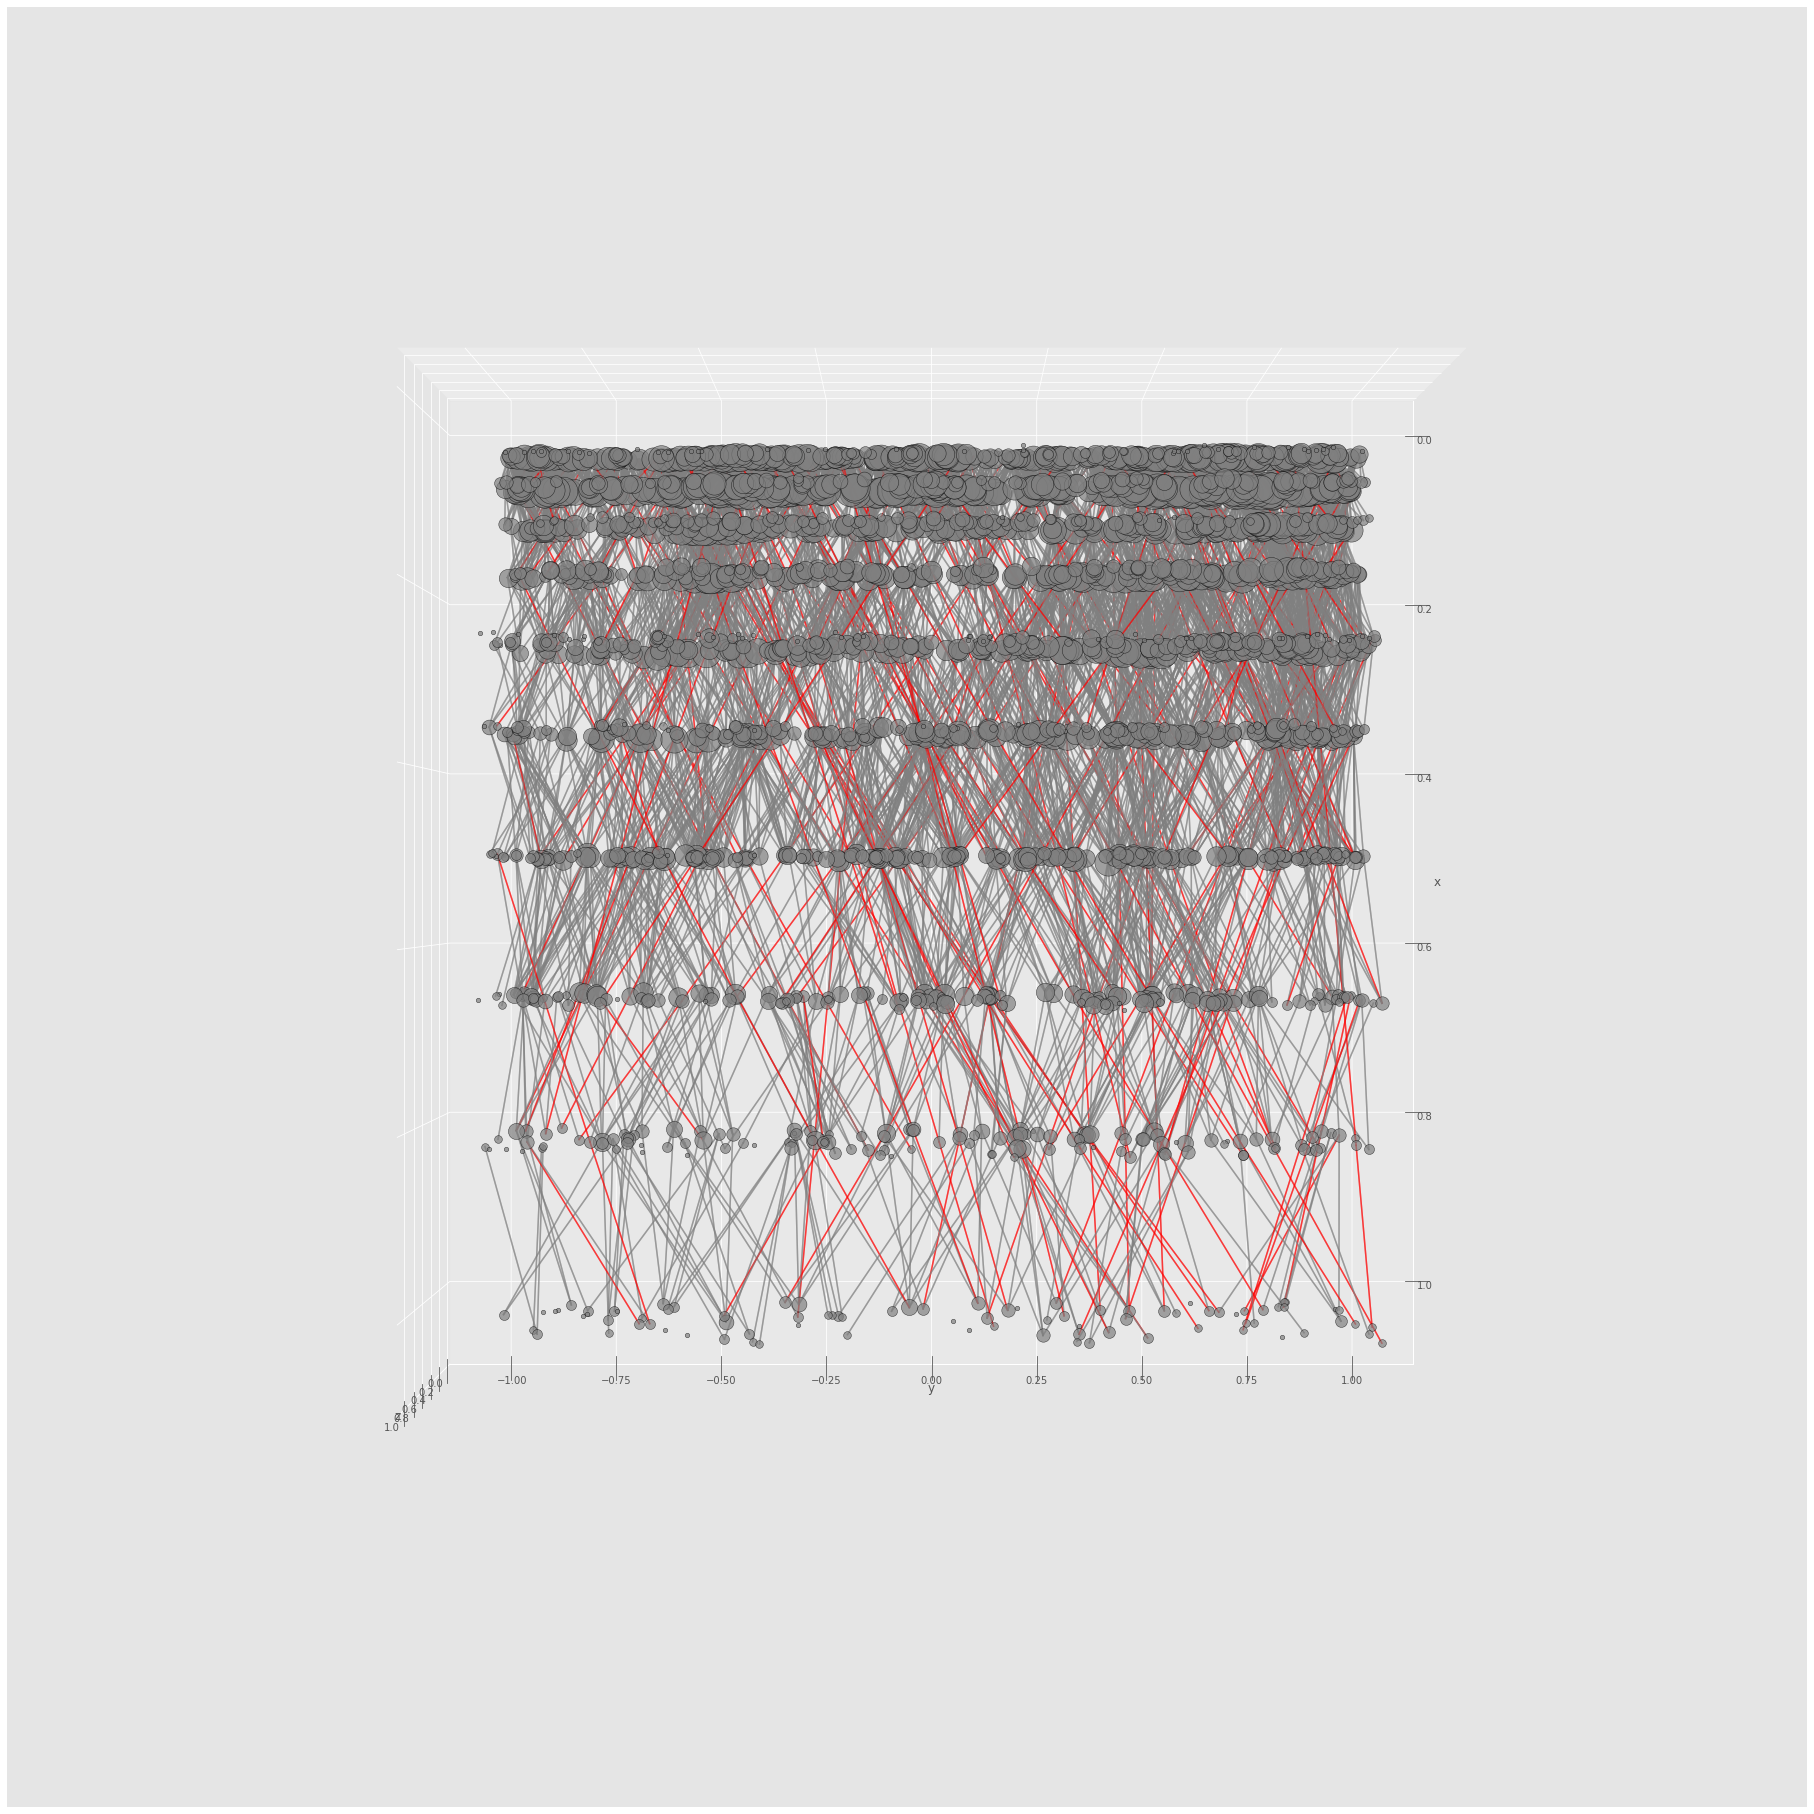

In [20]:
network_plot_3D(G,0, 90, False)

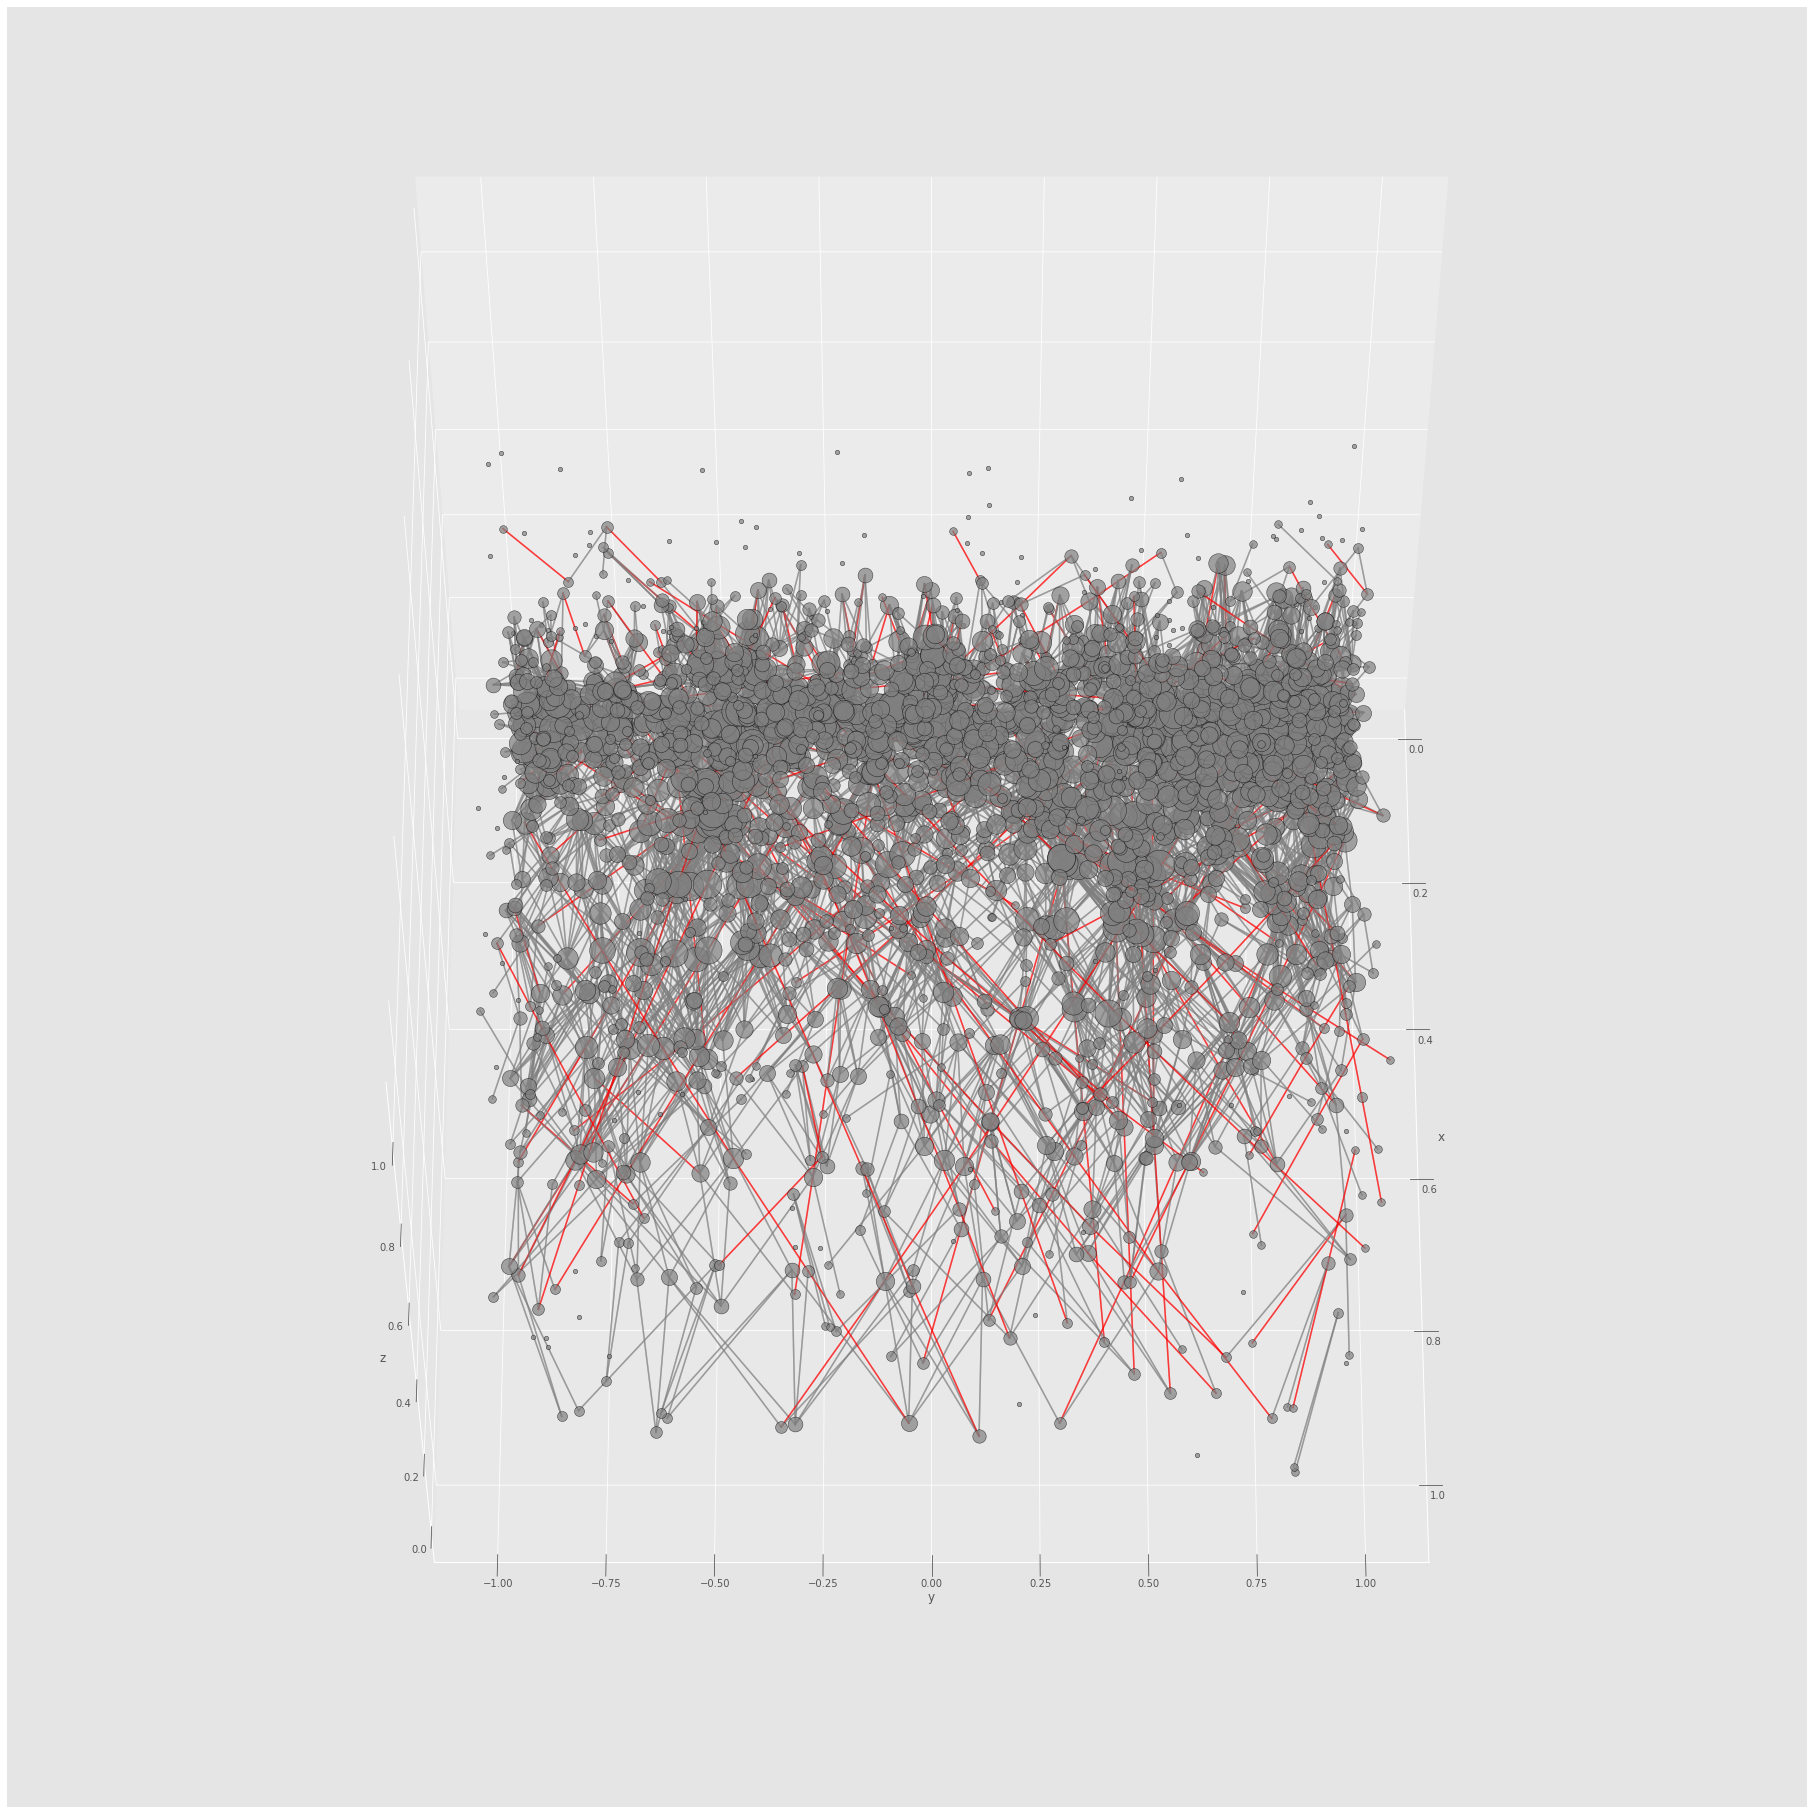

In [21]:
network_plot_3D(G,0, 60, False)

In [ ]:
for k in range(20,201,1):
   angle = (k-20)*360/(200-20)
    
   network_plot_3D(G,angle, 30, save=True)
   print(angle)

0.0
2.0
4.0
6.0
8.0
10.0
12.0
14.0
16.0
18.0
20.0
22.0
24.0
26.0
28.0
30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
46.0
48.0
50.0
52.0
54.0
56.0
58.0
60.0
62.0
64.0
66.0
68.0
70.0
72.0
74.0
76.0
78.0
80.0
82.0
84.0
86.0
88.0
90.0
92.0
94.0
96.0
98.0
100.0
102.0
104.0
106.0
108.0
110.0
112.0
114.0
116.0
118.0
120.0
122.0
124.0
126.0
128.0
130.0
132.0
134.0
136.0
138.0
140.0
142.0
144.0
146.0
148.0
150.0
152.0
154.0
156.0
158.0
160.0
162.0
164.0
166.0
168.0


In [21]:
def get_coord(Gp, xy=False, rz=False, rphi=False):
    pos = {}
    for node in Gp.nodes():
        r, phi, z = Gp.node[node]['pos'][:3]
        x = r * np.cos(phi)
        y = r * np.sin(phi)
        if xy:
            pos[node] = np.array([x, y])
        elif rz:
            pos[node] = np.array([y, r])
        else:
            pos[node] = np.array([phi, r])
    return pos

def plot_networkx2(G, ax=None, only_true=False, xy=True, rz=False, rphi=False):
    """G is networkx graph,
    node feature: {'pos': [r, phi, z]}
    edge feature: {"solution": []}
    """
    if ax is None:
        fig, ax = plt.subplots()

    n_edges = len(G.edges())
    edge_colors = [0.]*n_edges
    true_edges = []
    for iedge,edge in enumerate(G.edges(data=True)):
        if int(edge[2]['solution'][0]) == 1:
            edge_colors[iedge] = 'r'
            true_edges.append((edge[0], edge[1]))
        else:
            edge_colors[iedge] = 'grey'

    Gp = nx.edge_subgraph(G, true_edges) if only_true else G
    edge_colors = ['k']*len(true_edges) if only_true else edge_colors 

    pos = get_coord(Gp, xy, rz, rphi)
    
    if xy:
        plt.xlabel("x")
        plt.ylabel("y")
    elif rz:
        plt.xlabel("z")
        plt.ylabel("r")
    else:
        plt.xlabel("phi")
        plt.ylabel("r")

    nx.draw(Gp, pos, node_color='#A0CBE2', edge_color=edge_colors,
       width=0.5, with_labels=False, node_size=1, ax=ax, arrows=False)

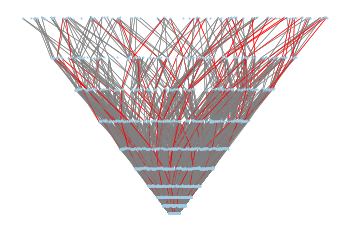

In [22]:
plot_networkx2(G, ax=None, only_true=False, xy=False, rz=True, rphi=False)

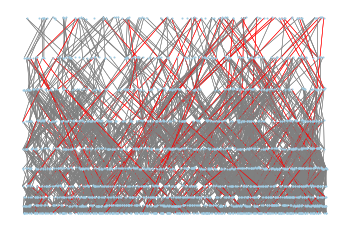

In [23]:
plot_networkx2(G, ax=None, only_true=False, xy=False, rz=False, rphi=True)

In [12]:
# import cv2
# import os

# image_folder = '/Users/butterchicken/research/exatrkx-neurips19/gnn-tracking/figs/'
# video_name = 'video.mp4'

# images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
# frame = cv2.imread(os.path.join(image_folder, images[0]))
# height, width, layers = frame.shape

# video = cv2.VideoWriter(video_name, 0, 1, (width,height))

# for image in images:
#     video.write(cv2.imread(os.path.join(image_folder, image)))

# cv2.destroyAllWindows()
# video.release()


import os
os.system("ffmpeg -f image2 -r 1/5 -i /Users/butterchicken/research/exatrkx-neurips19/gnn-tracking/%001d.0.png -vcodec mpeg4 -y /Users/butterchicken/research/exatrkx-neurips19/gnn-tracking/gnnplots.mp4")

32512